# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PF,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 128,
  "PH2" : False,
  "PH3" : True,
  "reducer" : sup.PH3_REDUCER_NAME_PCA,
  "kernel" : '',
  "n" : 15,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 2500
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,class_numeric
0,-4.507717,-4.250702,3.810780,2.247274,0.565646,1.479007,-0.113582,-1.296985,-1.182858,0.453613,-0.670041,0.969150,-0.581050,-0.567392,-0.394389,28
2,-4.031372,-4.504539,3.423657,2.363090,0.650237,1.391898,-0.307755,-1.376393,-1.158371,0.375557,-0.745796,1.004727,-0.545960,-0.637887,-0.466689,28
4,-3.962525,-4.601347,3.558202,2.540826,0.555050,1.351029,-0.395728,-1.236331,-1.076331,0.344620,-0.823330,0.966356,-0.580973,-0.608846,-0.502019,28
7,-4.076861,-4.654139,3.905437,2.531736,0.699645,1.402370,-0.372203,-1.345302,-1.041820,0.314673,-0.777993,0.920054,-0.604050,-0.625784,-0.487269,28
8,-3.419793,-4.840827,3.146646,2.691054,-0.186473,1.357468,-0.470890,-1.188576,-0.924465,0.383338,-0.858500,0.859967,-0.585743,-0.669265,-0.581764,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91742,-3.095002,5.217505,-2.246675,-0.965883,-0.216162,2.447969,-0.863604,-1.586979,-0.114401,-0.701924,-0.275351,-0.110139,-0.503390,-0.001542,0.018331,27
91744,-2.514117,4.976810,-2.719394,-0.953362,-0.431818,2.563575,-0.903416,-1.627583,-0.245954,-0.698224,-0.283635,0.009274,-0.617821,0.037634,-0.011733,27
91746,-1.719479,4.909486,-3.796522,-1.137458,-1.028482,2.979690,-0.809554,-1.925623,-0.288671,-0.733545,-0.323426,-0.148532,-0.465652,-0.081443,0.020689,27
91747,-2.168799,5.505364,-3.435779,-1.162765,-0.477287,2.732134,-0.947889,-1.658163,0.007799,-0.735339,-0.336157,-0.110953,-0.071984,-0.237221,0.169568,27


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.9565310263804336
0.983872690377016
0.9565073282719131
0.9567079524262823
0.9565620453351135


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


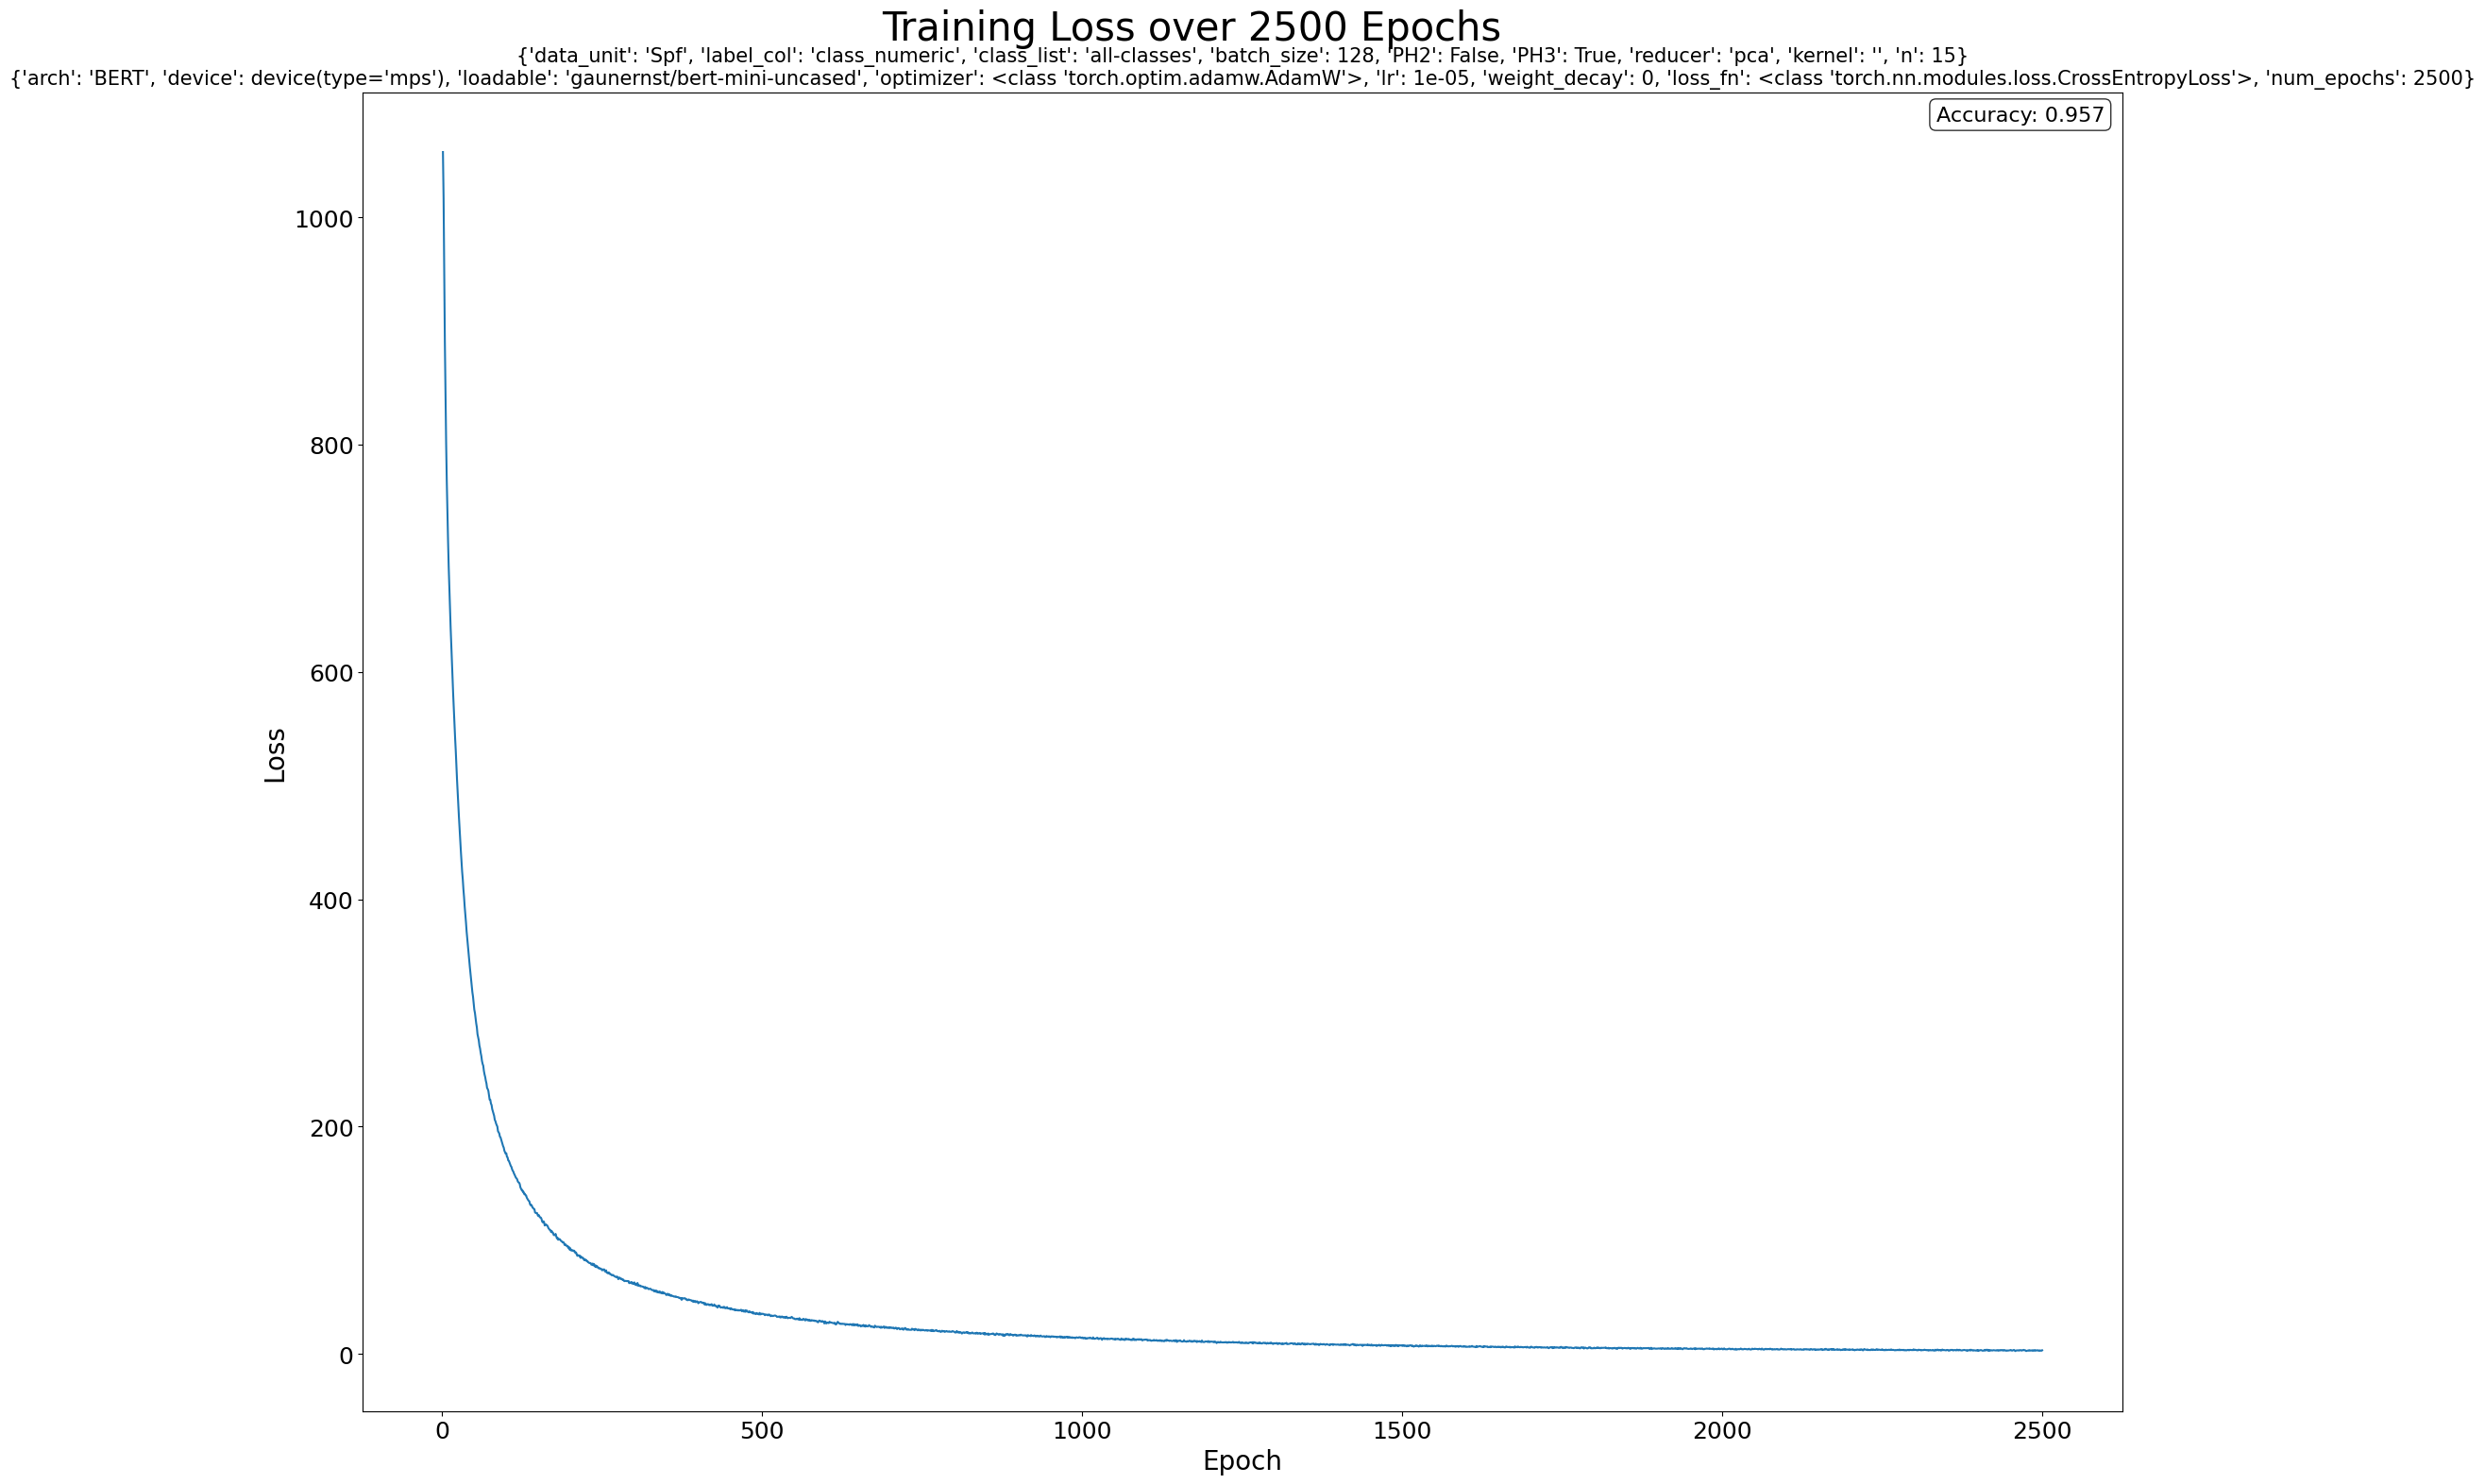

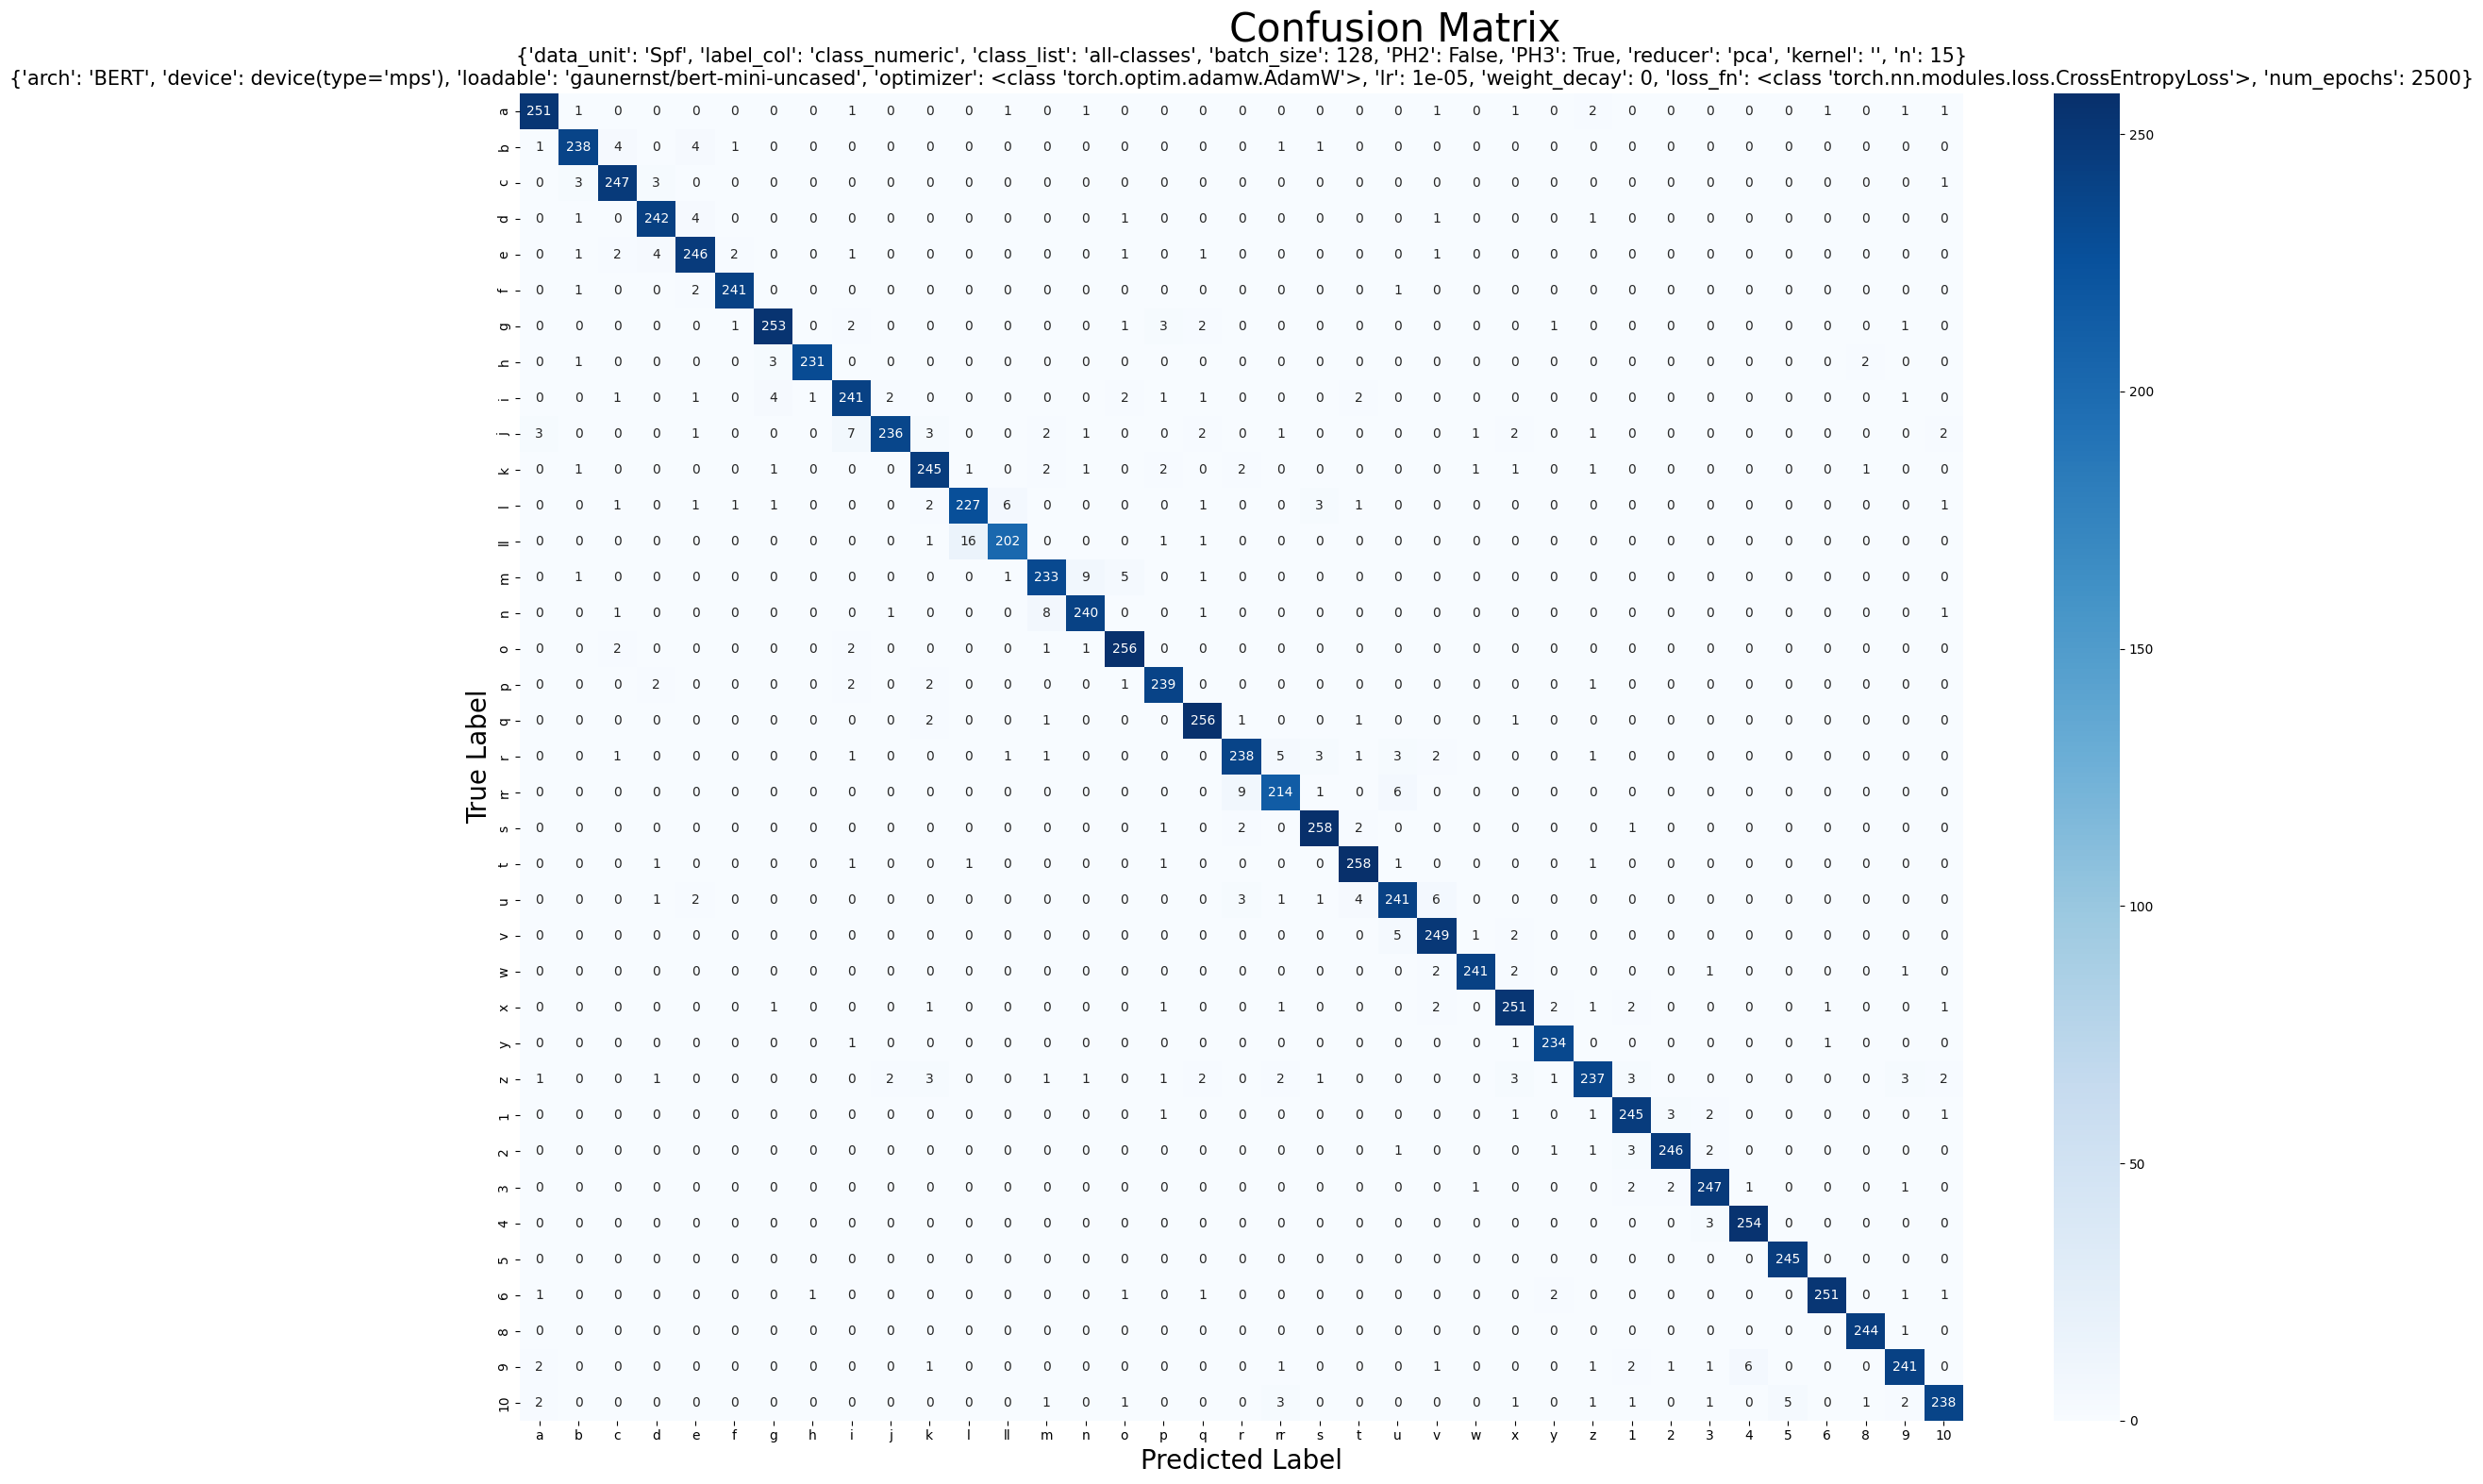

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

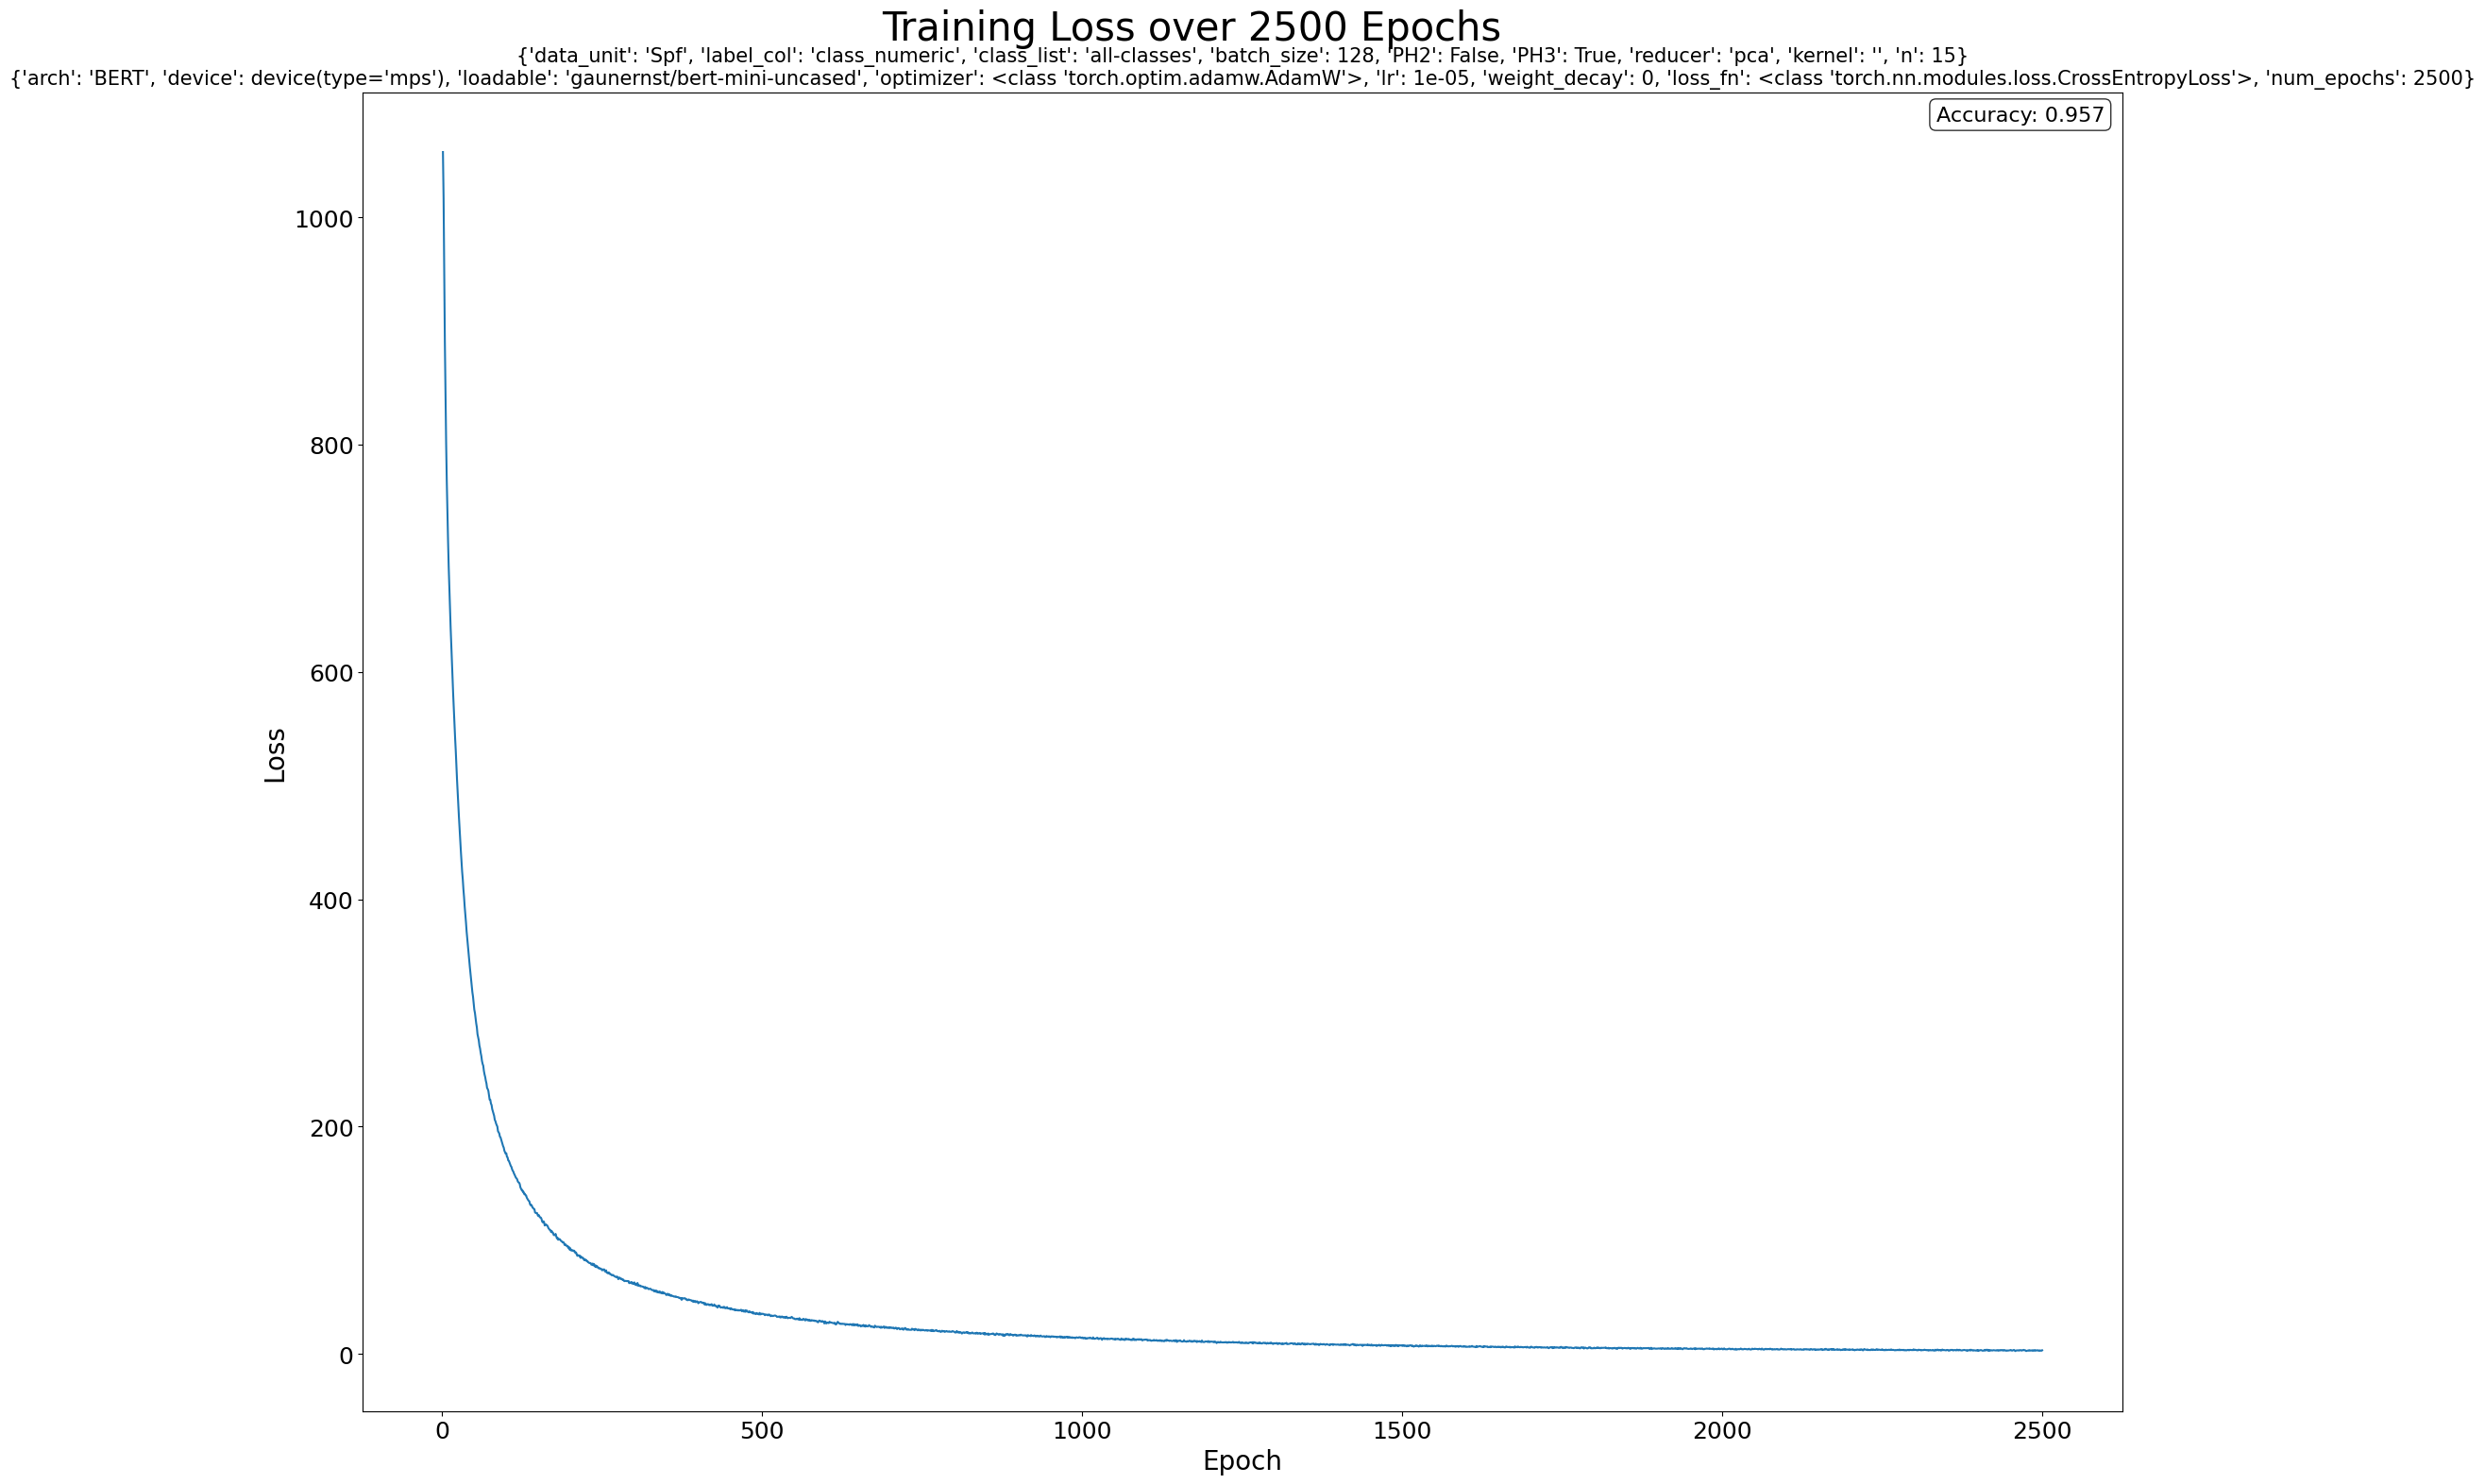

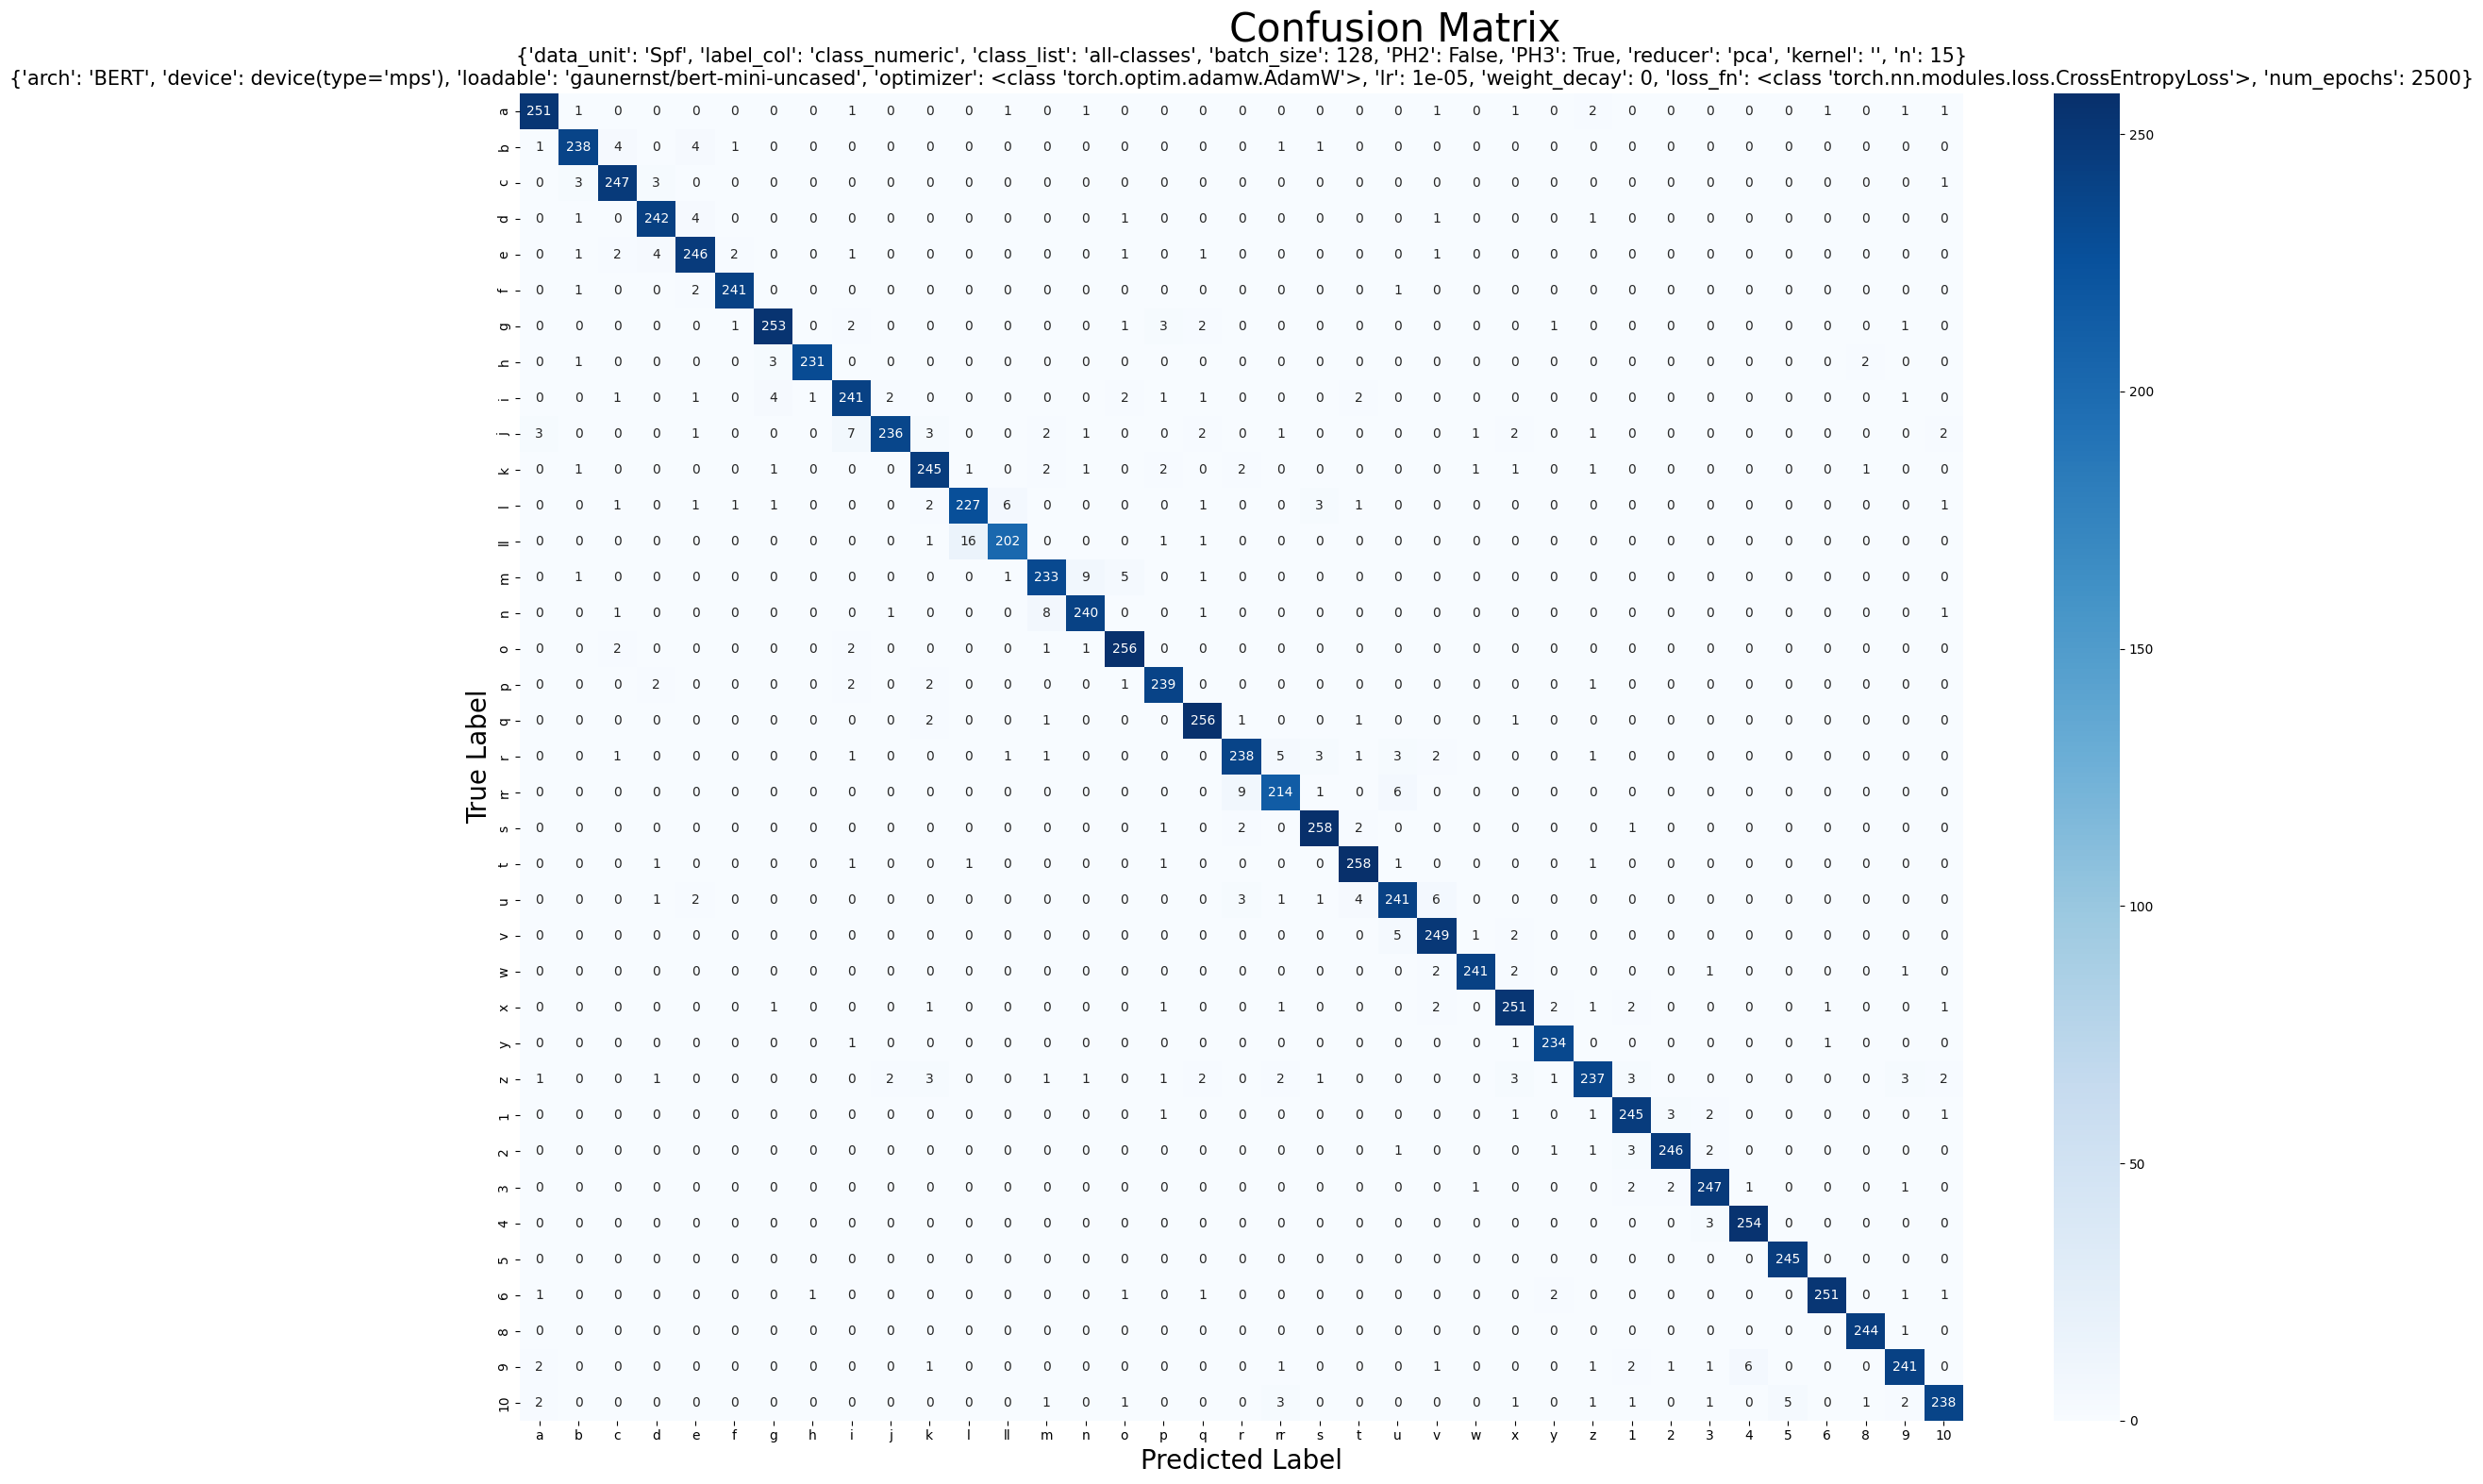

In [10]:
model.keep()
#bert.clean_bert()